# Обробка сигналів - лабораторна робота 3

Частина 2.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import get_window

In [3]:
def fft(signal, fs):
    N = len(signal)
    fft_vals = np.fft.fft(signal)

    freqs = np.fft.fftfreq(N, 1/fs)[:N//2]
    amplitudes = np.abs(fft_vals)[:N//2] / (N / 2)
    amplitudes[0] /= 2
    return freqs, amplitudes

## Завдання 1

In [4]:
N = 256
window_types = ['bartlett', 'barthann'] 

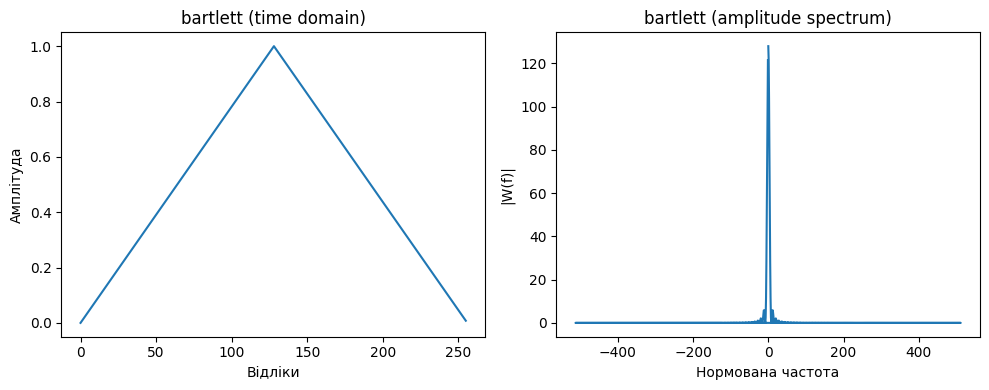

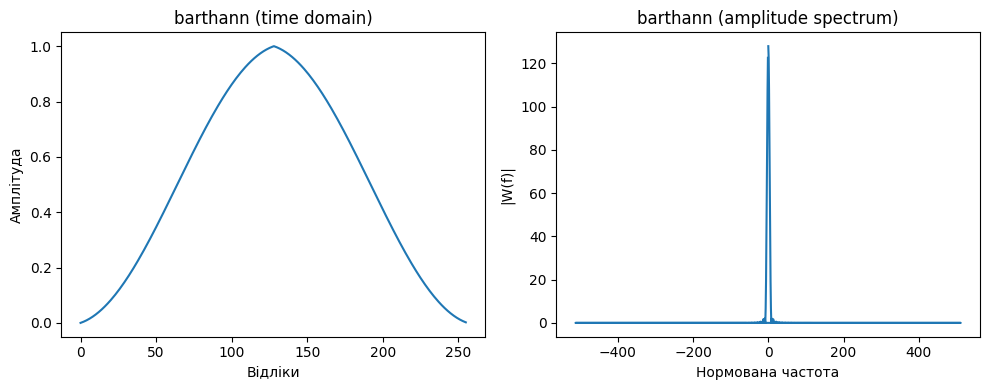

In [5]:
for wt in window_types:
    window = get_window(wt, N)
    plt.figure(figsize=(10, 4))
    plt.subplot(1,2,1)
    plt.plot(window)
    plt.title(f'{wt} (time domain)')
    plt.xlabel('Відліки')
    plt.ylabel('Амплітуда')

    plt.subplot(1,2,2)
    spectrum = np.fft.fft(window, 1024)
    freqs = np.fft.fftfreq(1024, d=1/1024)
    plt.plot(freqs, np.abs(spectrum))
    plt.title(f'{wt} (amplitude spectrum)')
    plt.xlabel('Нормована частота')
    plt.ylabel('|W(f)|')
    
    plt.tight_layout()
    plt.show()

## Завдання 2

In [6]:
T = 1
amplitude = 1
fs = 128

In [17]:
window = get_window("barthann", fs)

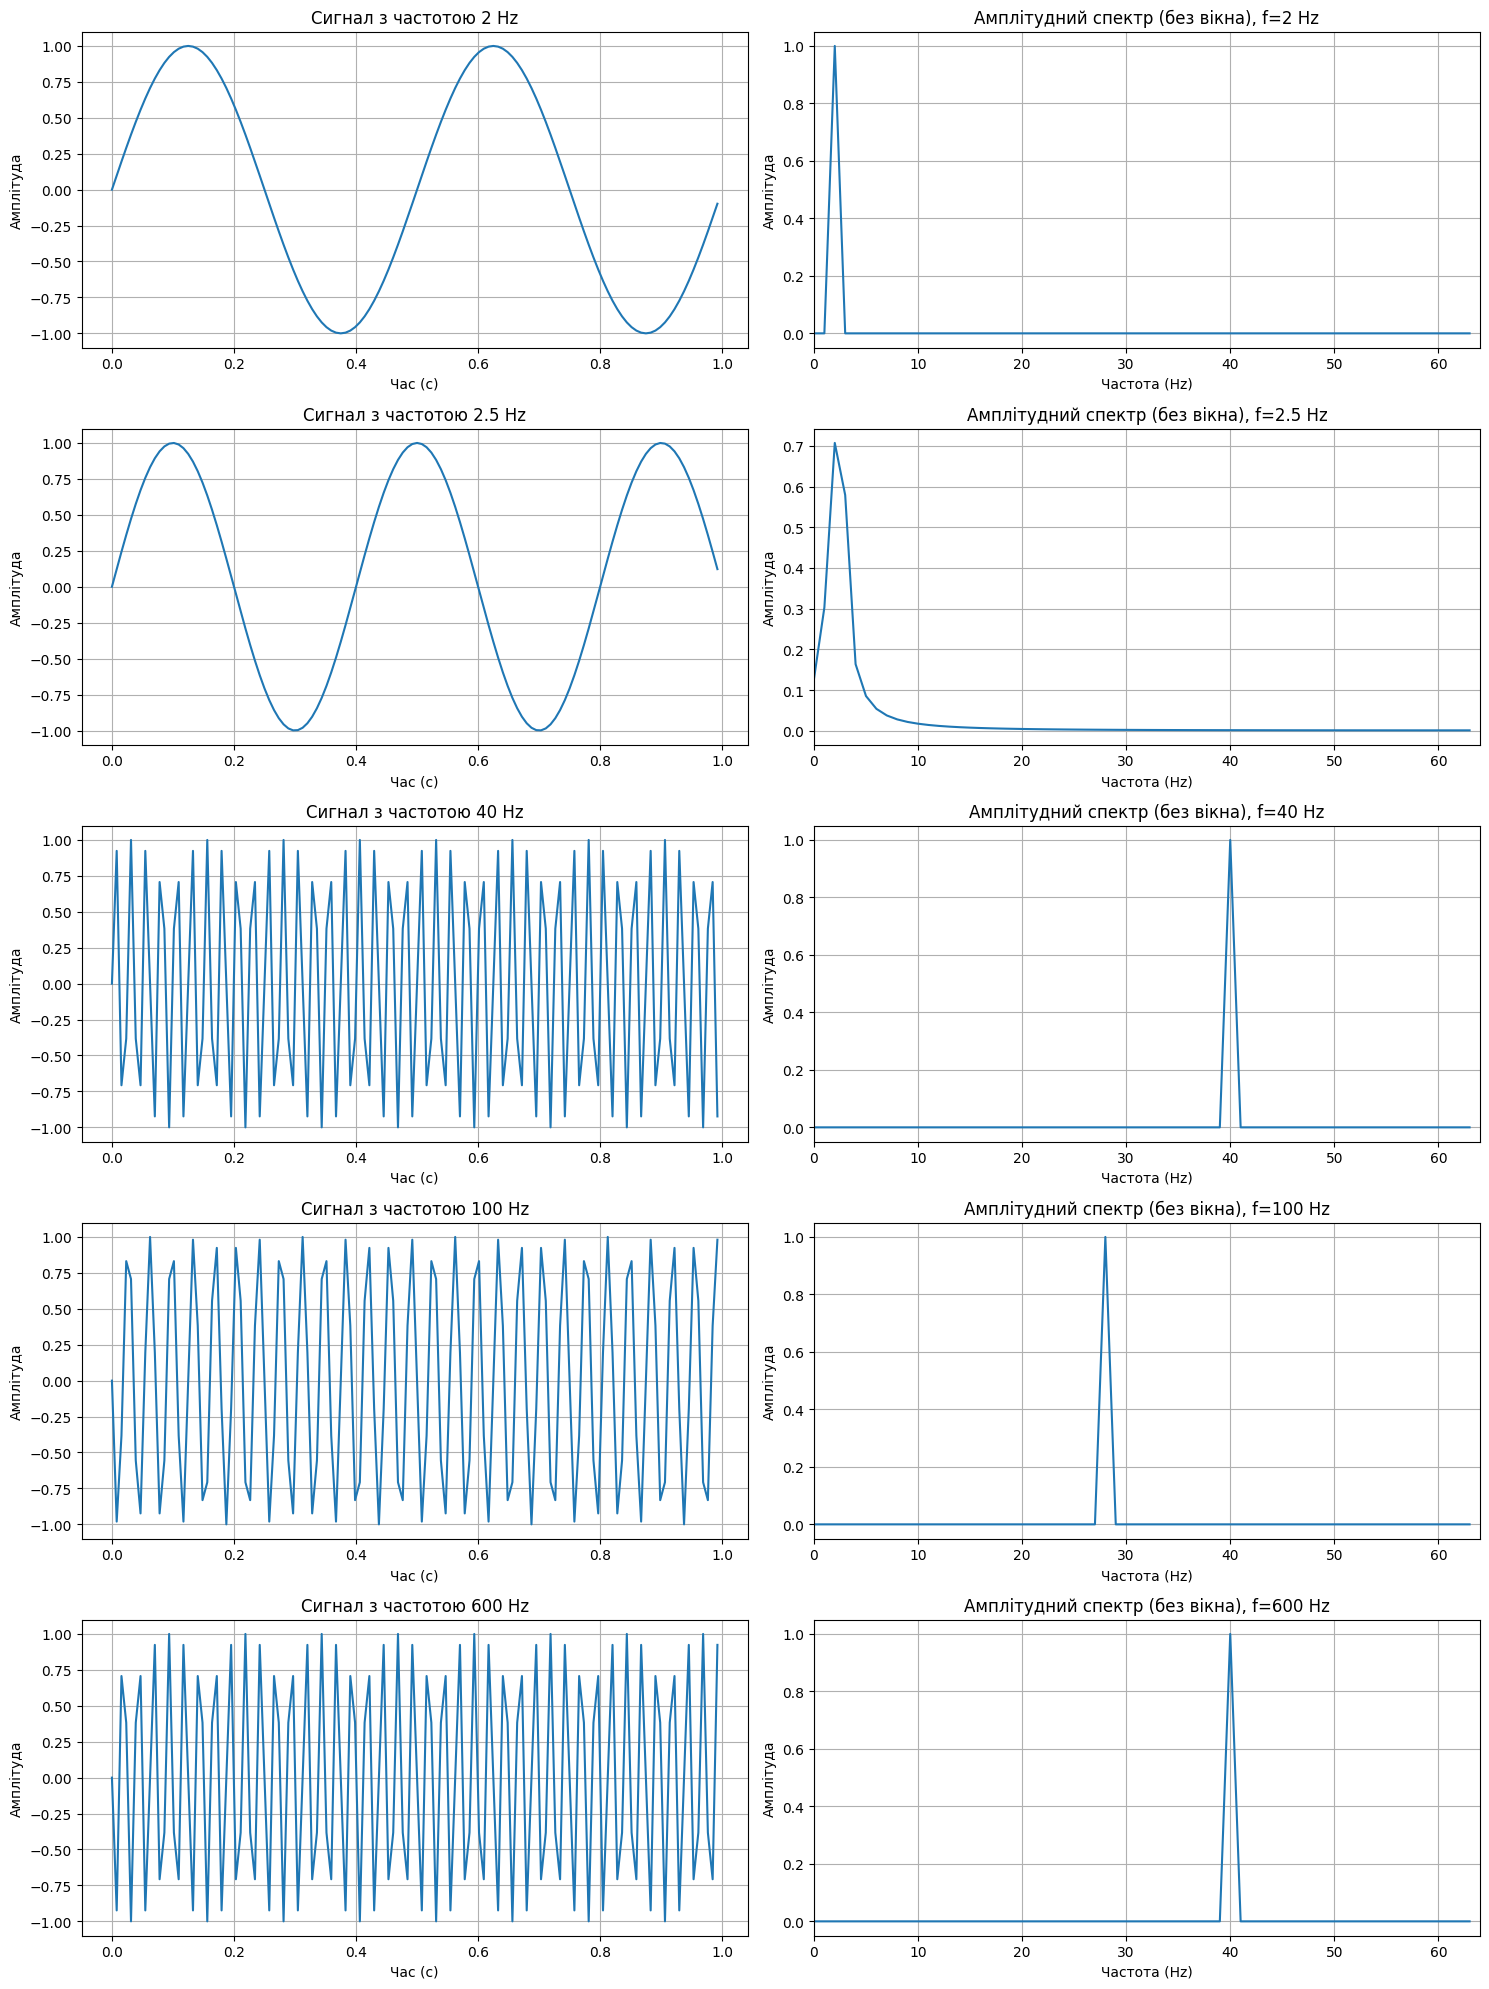

In [18]:
time = np.arange(0, T, 1/fs)
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
sin_freq = [2, 2.5, 40, 100, 600]
signals_1 = []

for i, f in enumerate(sin_freq):
    signal = amplitude * np.sin(2 * np.pi * f * time)
    freqs, amplitudes = fft(signal, fs)
    signals_1.append((signal, freqs, amplitudes))

    axes[i, 0].plot(time, signal)
    axes[i, 0].set_title(f'Сигнал з частотою {f} Hz')
    axes[i, 0].set_xlabel('Час (с)')
    axes[i, 0].set_ylabel('Амплітуда')
    axes[i, 0].grid(True)

    axes[i, 1].plot(freqs, amplitudes)
    axes[i, 1].set_title(f'Амплітудний спектр (без вікна), f={f} Hz')
    axes[i, 1].set_xlabel('Частота (Hz)')
    axes[i, 1].set_ylabel('Амплітуда')
    axes[i, 1].grid(True)
    axes[i, 1].set_xlim([0, fs/2])

plt.tight_layout()
plt.show()


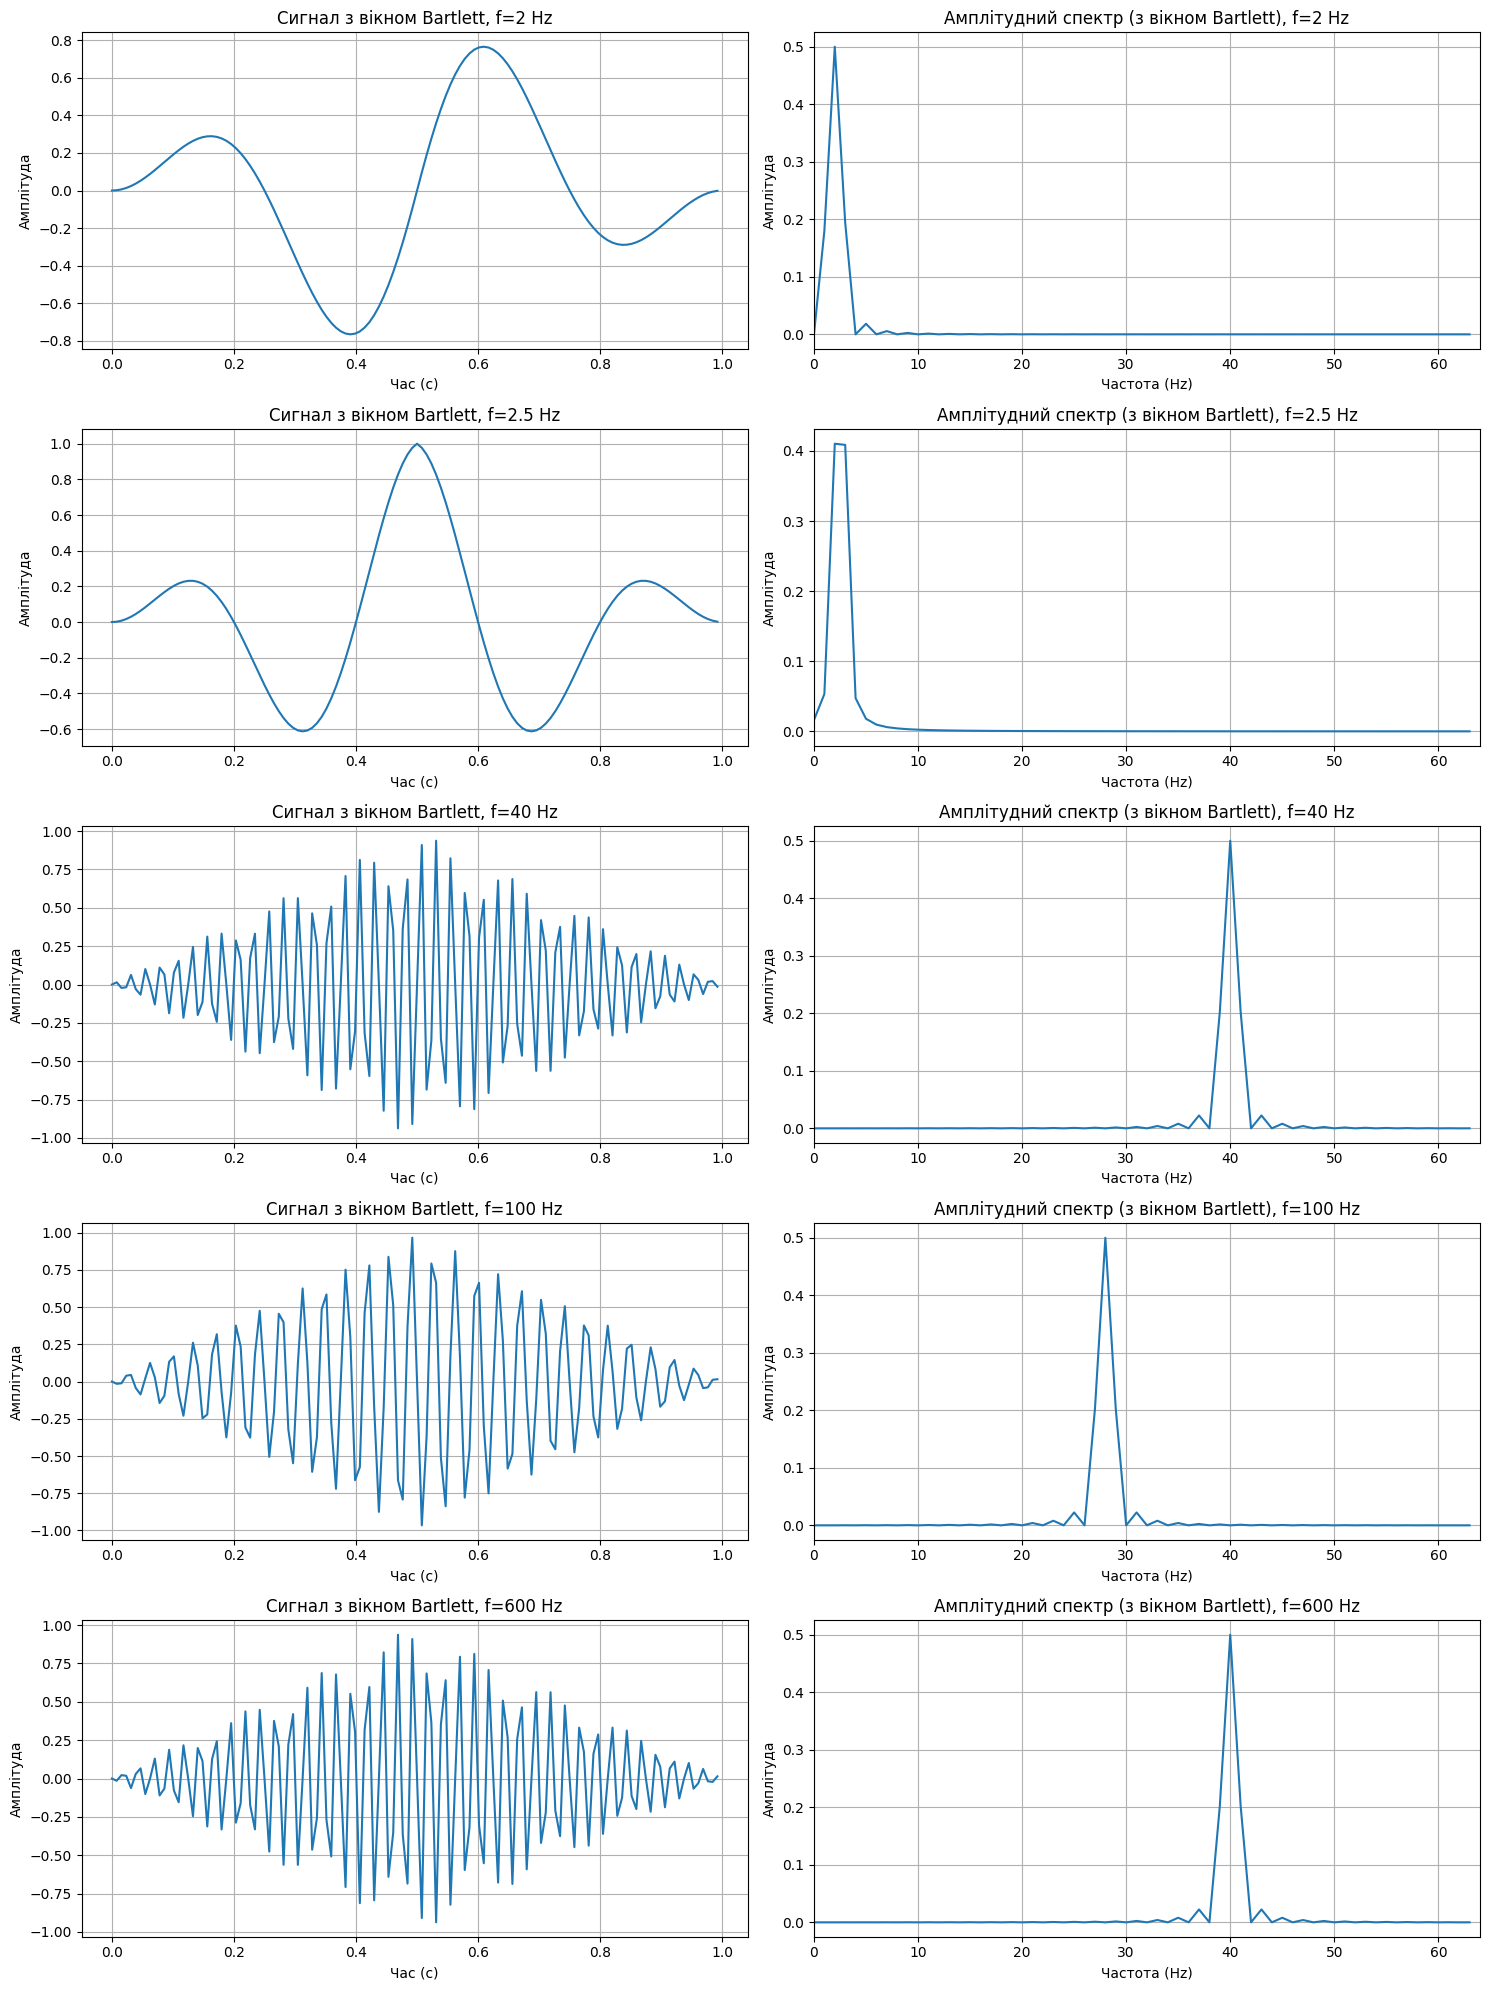

In [19]:
window = get_window('bartlett', len(time))

fig, axes = plt.subplots(5, 2, figsize=(15, 20))
signals_windowed = []

for i, f in enumerate(sin_freq):
    signal = amplitude * np.sin(2 * np.pi * f * time)
    signal_windowed = signal * window
    freqs, amplitudes = fft(signal_windowed, fs)
    signals_windowed.append((signal_windowed, freqs, amplitudes))
    
    axes[i, 0].plot(time, signal_windowed)
    axes[i, 0].set_title(f'Сигнал з вікном Bartlett, f={f} Hz')
    axes[i, 0].set_xlabel('Час (с)')
    axes[i, 0].set_ylabel('Амплітуда')
    axes[i, 0].grid(True)

    axes[i, 1].plot(freqs, amplitudes)
    axes[i, 1].set_title(f'Амплітудний спектр (з вікном Bartlett), f={f} Hz')
    axes[i, 1].set_xlabel('Частота (Hz)')
    axes[i, 1].set_ylabel('Амплітуда')
    axes[i, 1].grid(True)
    axes[i, 1].set_xlim([0, fs/2])

plt.tight_layout()
plt.show()


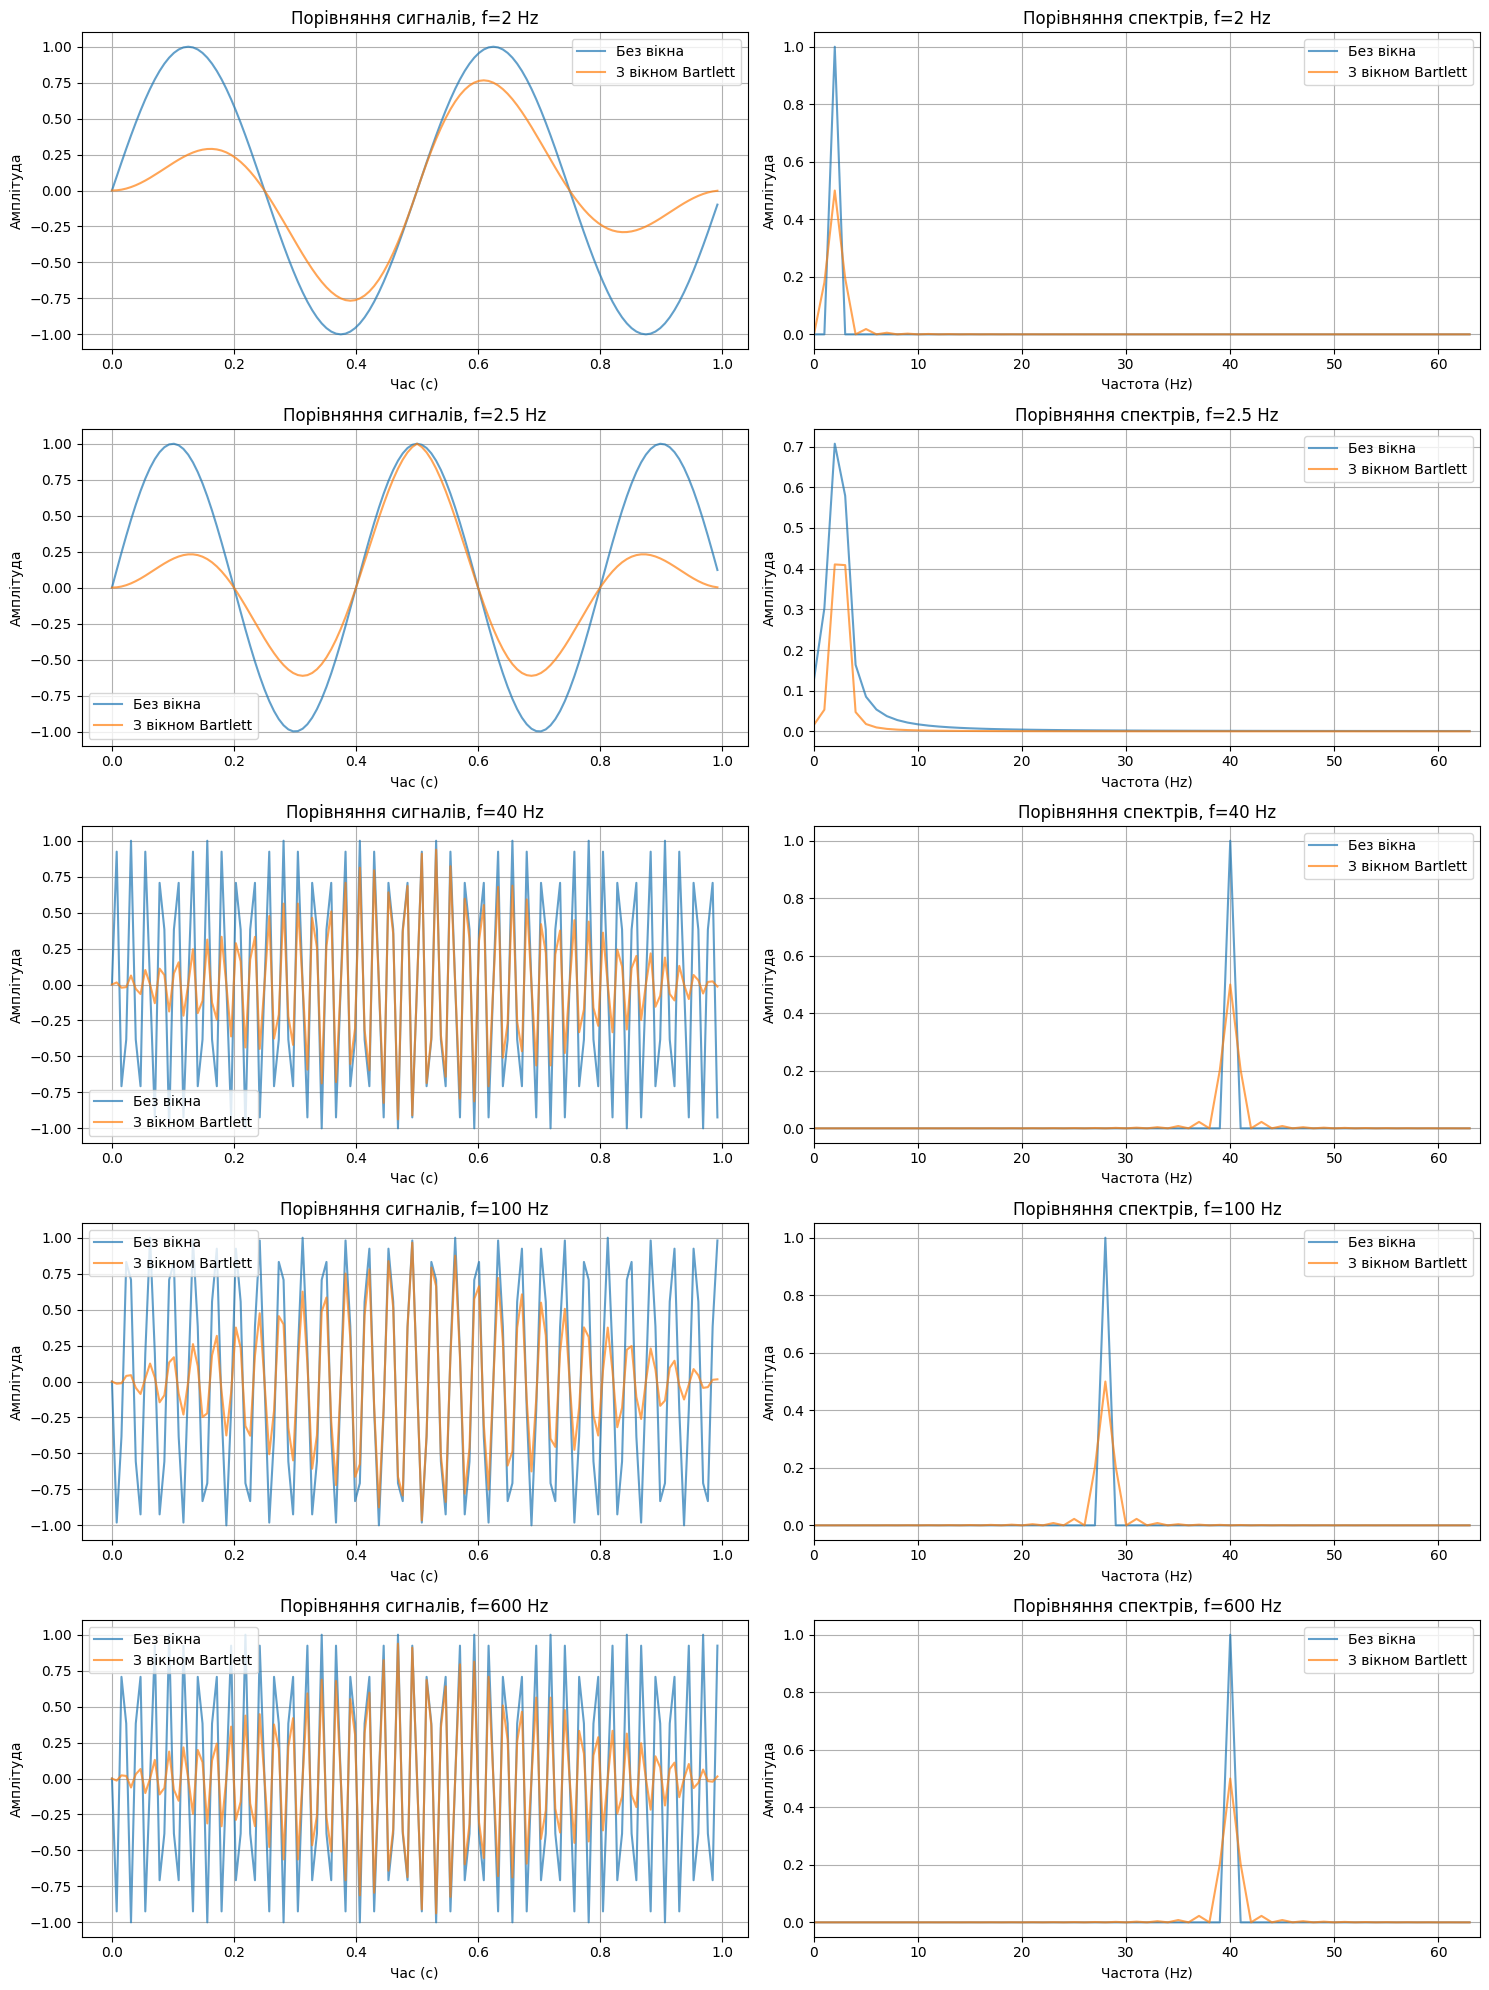

In [20]:
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

for i, f in enumerate(sin_freq):
    signal_orig, freqs_orig, amplitudes_orig = signals_1[i]
    signal_win, freqs_win, amplitudes_win = signals_windowed[i]
    
    axes[i, 0].plot(time, signal_orig, label='Без вікна', alpha=0.7)
    axes[i, 0].plot(time, signal_win, label='З вікном Bartlett', alpha=0.7)
    axes[i, 0].set_title(f'Порівняння сигналів, f={f} Hz')
    axes[i, 0].set_xlabel('Час (с)')
    axes[i, 0].set_ylabel('Амплітуда')
    axes[i, 0].legend()
    axes[i, 0].grid(True)
    
    axes[i, 1].plot(freqs_orig, amplitudes_orig, label='Без вікна', alpha=0.7)
    axes[i, 1].plot(freqs_win, amplitudes_win, label='З вікном Bartlett', alpha=0.7)
    axes[i, 1].set_title(f'Порівняння спектрів, f={f} Hz')
    axes[i, 1].set_xlabel('Частота (Hz)')
    axes[i, 1].set_ylabel('Амплітуда')
    axes[i, 1].legend()
    axes[i, 1].grid(True)
    axes[i, 1].set_xlim([0, fs/2])

plt.tight_layout()
plt.show()


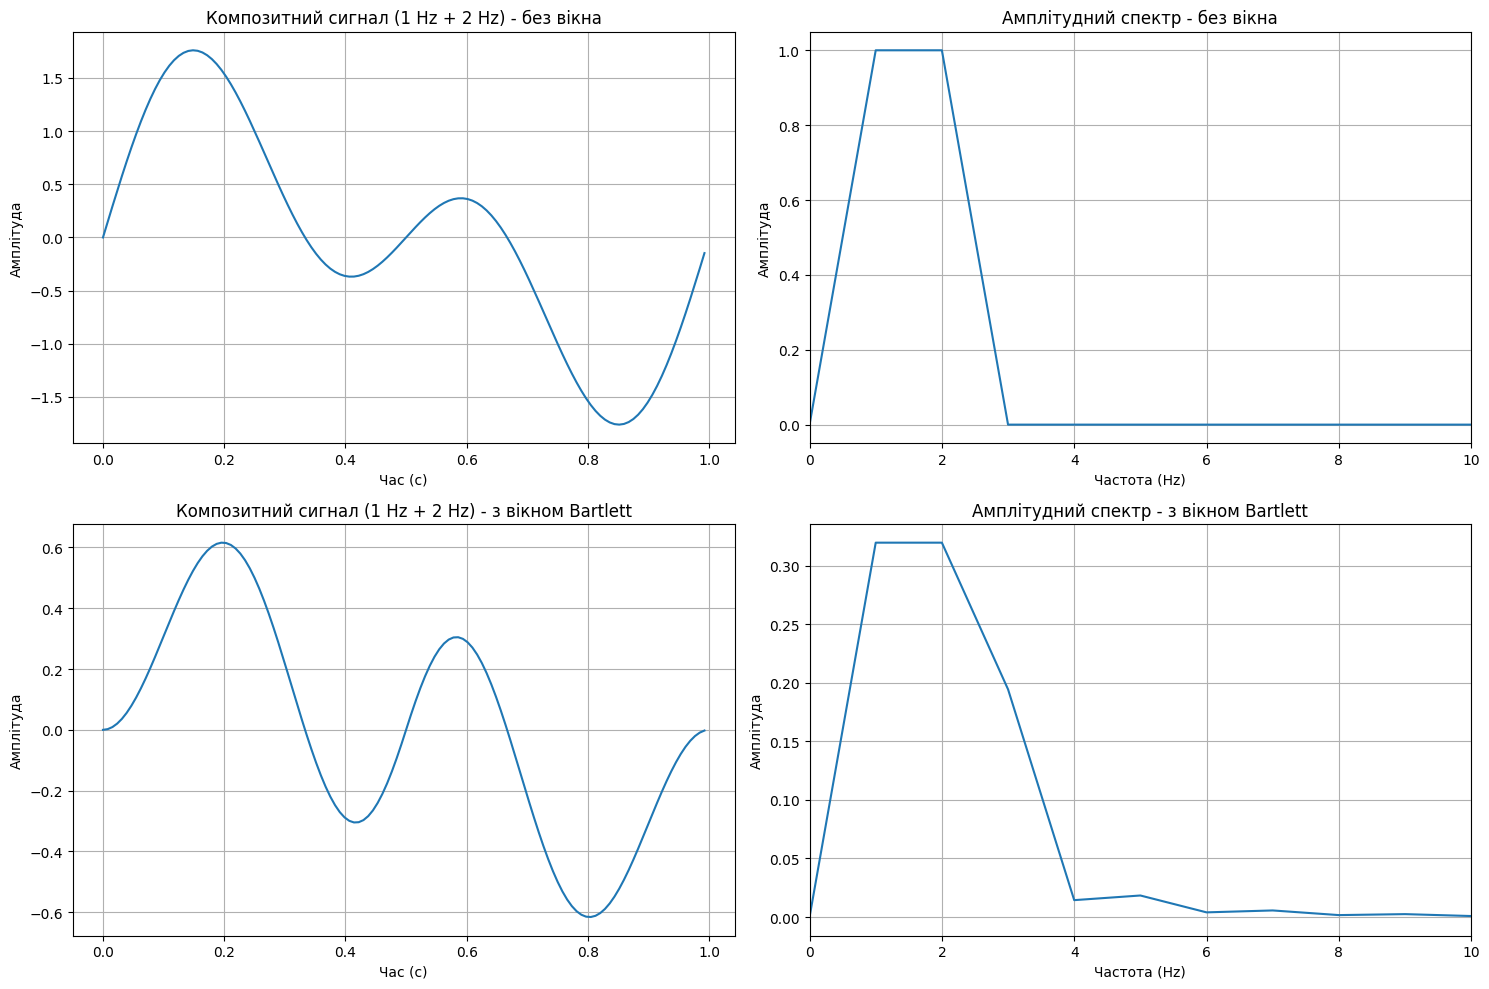

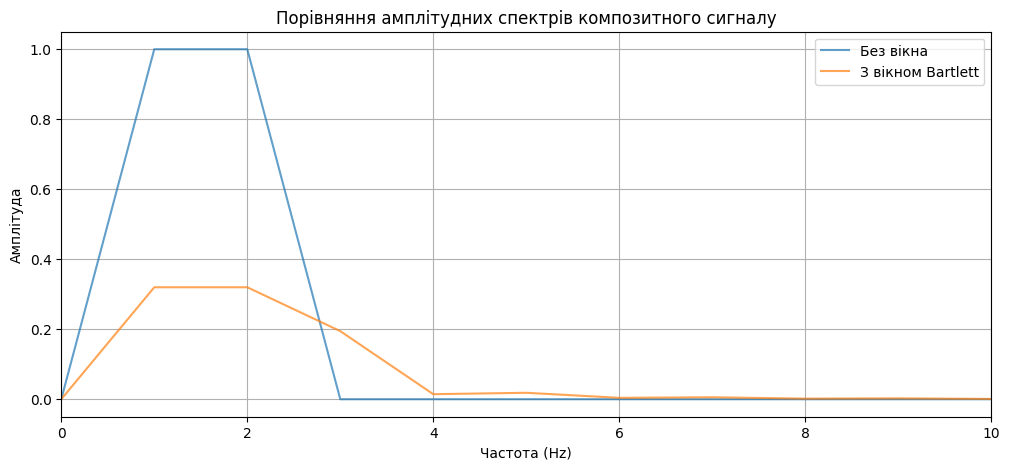

In [21]:
sin_1 = amplitude * np.sin(2 * np.pi * 1 * time)
sin_2 = amplitude * np.sin(2 * np.pi * 2 * time)
composite_signal = sin_1 + sin_2

composite_freqs, composite_amplitudes = fft(composite_signal, fs)

composite_windowed = composite_signal * window
composite_freqs_win, composite_amplitudes_win = fft(composite_windowed, fs)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].plot(time, composite_signal)
axes[0, 0].set_title('Композитний сигнал (1 Hz + 2 Hz) - без вікна')
axes[0, 0].set_xlabel('Час (с)')
axes[0, 0].set_ylabel('Амплітуда')
axes[0, 0].grid(True)

axes[0, 1].plot(composite_freqs, composite_amplitudes)
axes[0, 1].set_title('Амплітудний спектр - без вікна')
axes[0, 1].set_xlabel('Частота (Hz)')
axes[0, 1].set_ylabel('Амплітуда')
axes[0, 1].grid(True)
axes[0, 1].set_xlim([0, 10])

axes[1, 0].plot(time, composite_windowed)
axes[1, 0].set_title('Композитний сигнал (1 Hz + 2 Hz) - з вікном Bartlett')
axes[1, 0].set_xlabel('Час (с)')
axes[1, 0].set_ylabel('Амплітуда')
axes[1, 0].grid(True)

axes[1, 1].plot(composite_freqs_win, composite_amplitudes_win)
axes[1, 1].set_title('Амплітудний спектр - з вікном Bartlett')
axes[1, 1].set_xlabel('Частота (Hz)')
axes[1, 1].set_ylabel('Амплітуда')
axes[1, 1].grid(True)
axes[1, 1].set_xlim([0, 10])

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(composite_freqs, composite_amplitudes, label='Без вікна', alpha=0.7)
plt.plot(composite_freqs_win, composite_amplitudes_win, label='З вікном Bartlett', alpha=0.7)
plt.title('Порівняння амплітудних спектрів композитного сигналу')
plt.xlabel('Частота (Hz)')
plt.ylabel('Амплітуда')
plt.xlim([0, 10])
plt.legend()
plt.grid(True)
plt.show()


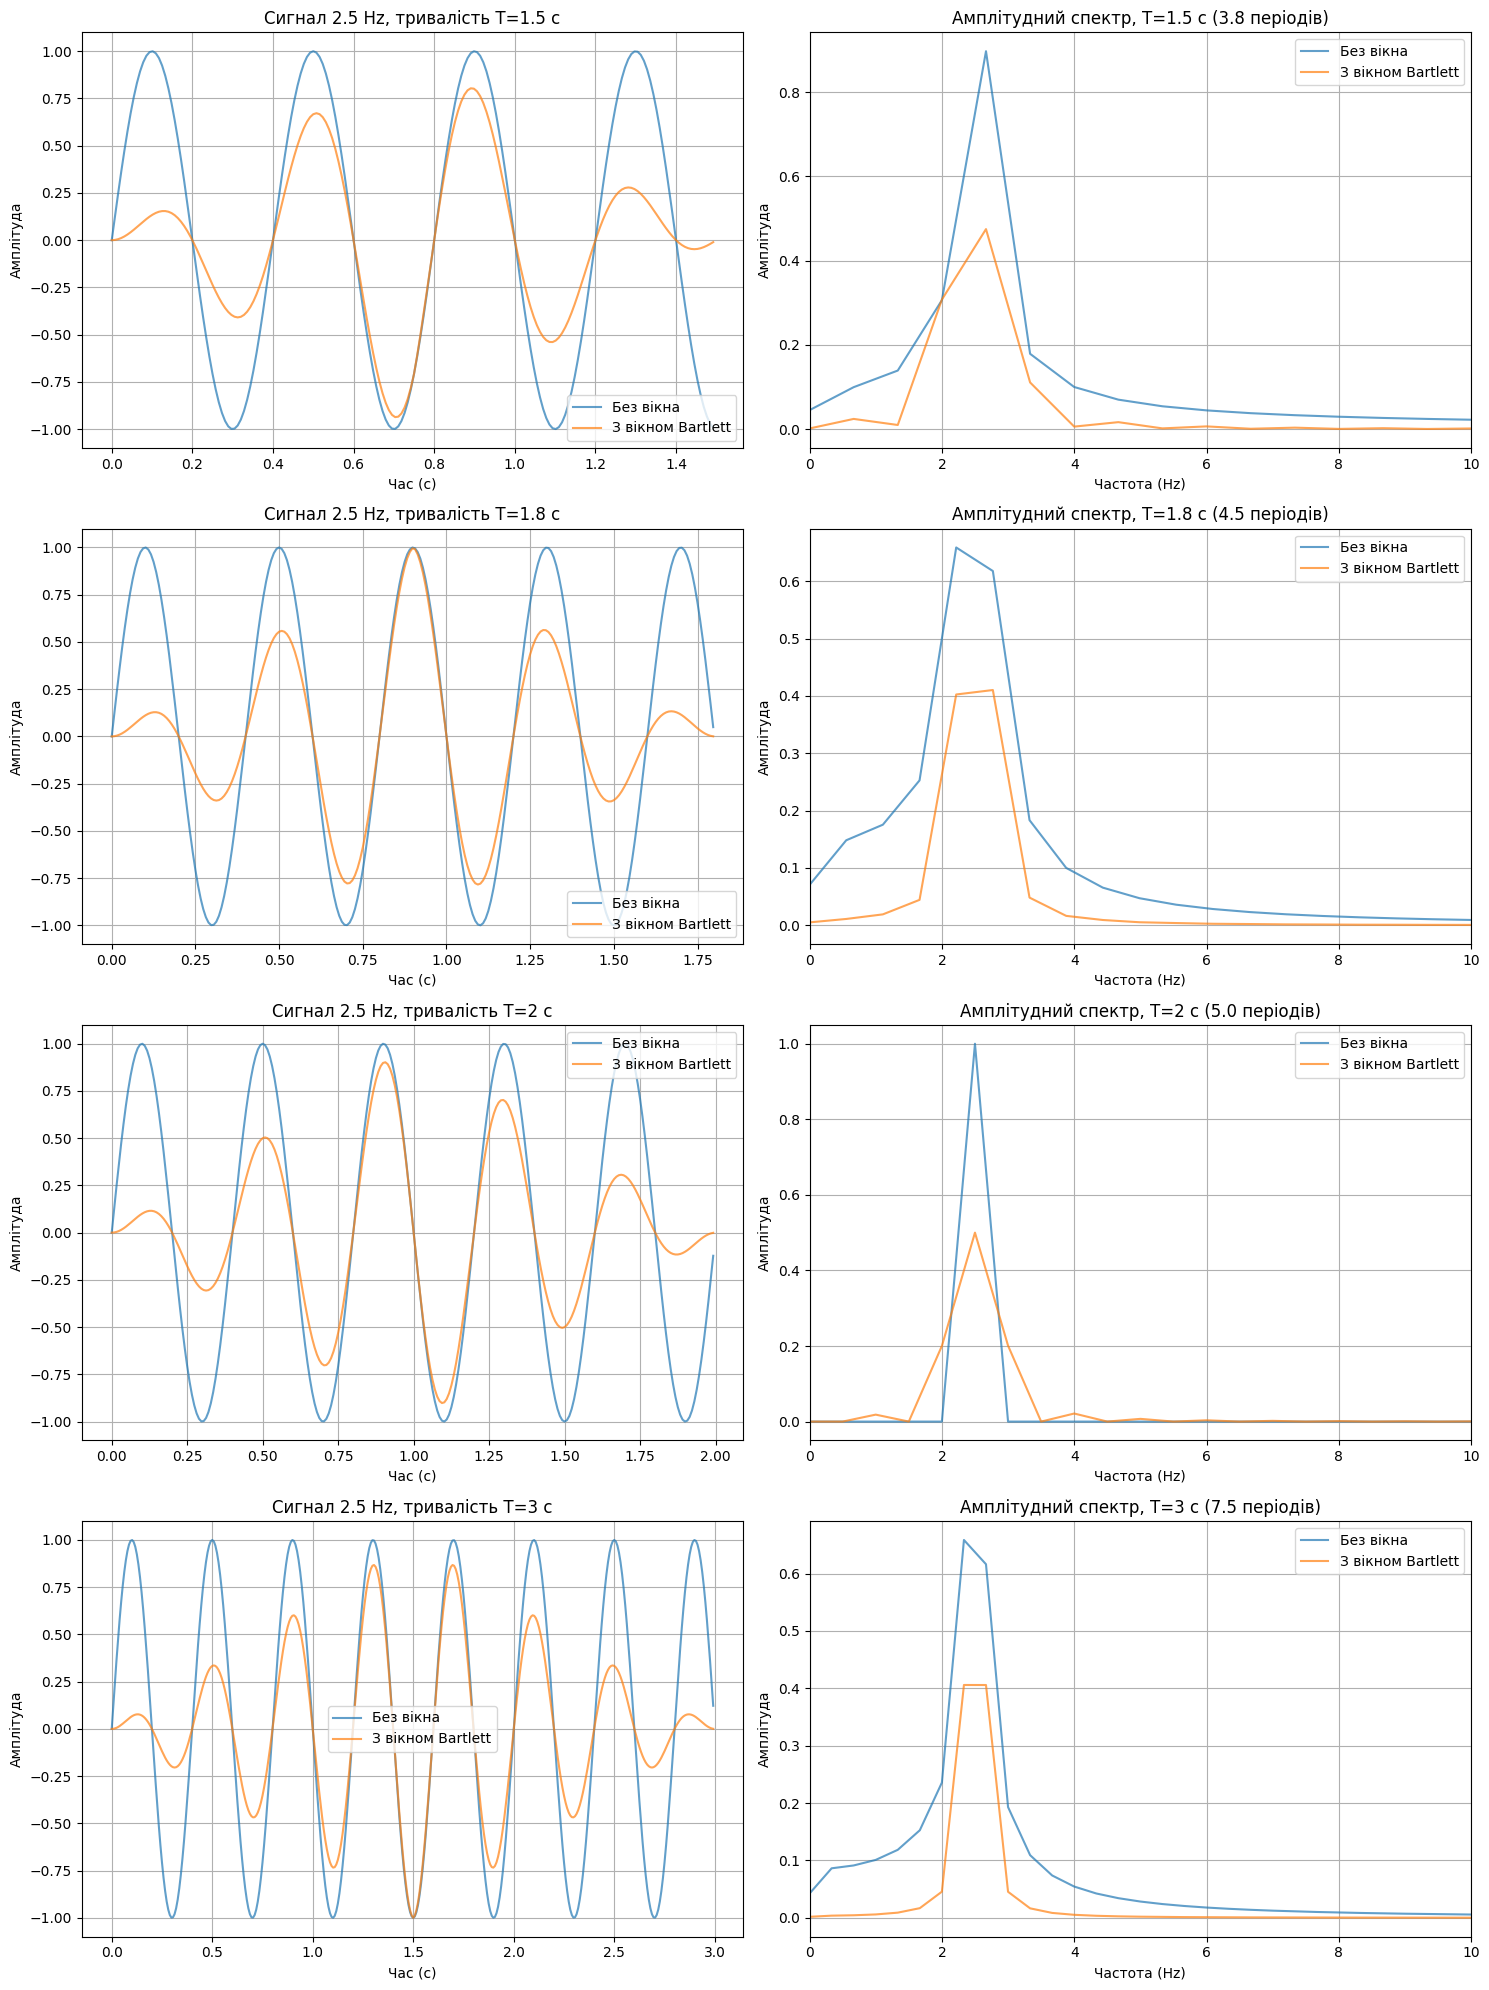

In [22]:
f = 2.5
times = [1.5, 1.8, 2, 3]

fig, axes = plt.subplots(len(times), 2, figsize=(15, 5 * len(times)))

for idx, t in enumerate(times):
    time_arr = np.arange(0, t, 1/fs)
    signal = amplitude * np.sin(2 * np.pi * f * time_arr)
    
    freqs, amplitudes = fft(signal, fs)
    
    window_t = get_window('bartlett', len(time_arr))
    signal_windowed = signal * window_t
    freqs_win, amplitudes_win = fft(signal_windowed, fs)
    
    axes[idx, 0].plot(time_arr, signal, label='Без вікна', alpha=0.7)
    axes[idx, 0].plot(time_arr, signal_windowed, label='З вікном Bartlett', alpha=0.7)
    axes[idx, 0].set_title(f'Сигнал 2.5 Hz, тривалість T={t} с')
    axes[idx, 0].set_xlabel('Час (с)')
    axes[idx, 0].set_ylabel('Амплітуда')
    axes[idx, 0].legend()
    axes[idx, 0].grid(True)
    
    axes[idx, 1].plot(freqs, amplitudes, label='Без вікна', alpha=0.7)
    axes[idx, 1].plot(freqs_win, amplitudes_win, label='З вікном Bartlett', alpha=0.7)
    axes[idx, 1].set_title(f'Амплітудний спектр, T={t} с ({t*f:.1f} періодів)')
    axes[idx, 1].set_xlabel('Частота (Hz)')
    axes[idx, 1].set_ylabel('Амплітуда')
    axes[idx, 1].set_xlim([0, 10])
    axes[idx, 1].legend()
    axes[idx, 1].grid(True)

plt.tight_layout()
plt.show()
